In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('DOB_Certificate_Of_Occupancy.csv',
                usecols = ['ISSUE_TYPE', 'C_O_ISSUE_DATE', 'BOROUGH', 'PR_DWELLING_UNIT', 'EX_DWELLING_UNIT', 'COUNCIL_DISTRICT'],
                #dtype={'PR_DWELLING_UNIT': 'int32', 'EX_DWELLING_UNIT': 'int32', 'COUNCIL_DISTRICT': 'int32'},
                 parse_dates=['C_O_ISSUE_DATE']
                )

/Users/bethanys08/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Sort by final certificate of occupancy
final = df[df.ISSUE_TYPE == 'Final']


In [4]:
#only data from 2016 onwards
final = final[ final.C_O_ISSUE_DATE > '2016-01-01']

In [5]:
# replace infs with nans
final = final.replace([np.inf, -np.inf], np.nan)

In [6]:
# fill nans with zeros
final[['PR_DWELLING_UNIT', 'EX_DWELLING_UNIT', 'COUNCIL_DISTRICT']] = final[['PR_DWELLING_UNIT', 'EX_DWELLING_UNIT', 'COUNCIL_DISTRICT']].fillna(value=0)



In [7]:
final.head()

,C_O_ISSUE_DATE,BOROUGH,PR_DWELLING_UNIT,EX_DWELLING_UNIT,ISSUE_TYPE,COUNCIL_DISTRICT
3,2019-11-21,Queens,0,0.0,Final,30.0
6,2019-11-21,Bronx,0,0.0,Final,15.0
7,2019-11-21,Manhattan,4,2.0,Final,4.0
17,2019-11-21,Queens,1,1.0,Final,19.0
19,2019-03-26,Manhattan,48,47.0,Final,4.0


In [8]:
# convert types to ints
final = final.astype({'PR_DWELLING_UNIT': 'int32', 'EX_DWELLING_UNIT': 'int32', 'COUNCIL_DISTRICT': 'int32'})

In [9]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18099 entries, 3 to 114034
Data columns (total 6 columns):
C_O_ISSUE_DATE      18099 non-null datetime64[ns]
BOROUGH             18099 non-null object
PR_DWELLING_UNIT    18099 non-null int32
EX_DWELLING_UNIT    18099 non-null int32
ISSUE_TYPE          18099 non-null object
COUNCIL_DISTRICT    18099 non-null int32
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 777.7+ KB


In [10]:
final['NET_DWELLING_UNIT'] = final.PR_DWELLING_UNIT - final.EX_DWELLING_UNIT
final['YearMonth'] = pd.to_datetime(final['C_O_ISSUE_DATE']).apply(lambda x: '%d-%02d' % (x.year, x.month))


In [11]:
final.head()

,C_O_ISSUE_DATE,BOROUGH,PR_DWELLING_UNIT,EX_DWELLING_UNIT,ISSUE_TYPE,COUNCIL_DISTRICT,NET_DWELLING_UNIT,YearMonth
3,2019-11-21,Queens,0,0,Final,30,0,2019-11
6,2019-11-21,Bronx,0,0,Final,15,0,2019-11
7,2019-11-21,Manhattan,4,2,Final,4,2,2019-11
17,2019-11-21,Queens,1,1,Final,19,0,2019-11
19,2019-03-26,Manhattan,48,47,Final,4,1,2019-03


# Whole City Data

In [12]:
# Group by borough and month
grouped = final.groupby([final.YearMonth]).sum()

# create rolling average for new units
grouped['Rolling'] = grouped.NET_DWELLING_UNIT.rolling(window=12, min_periods=1).mean()
grouped.reset_index(inplace=True)
# convert to datetime
grouped['Date'] = pd.to_datetime(grouped.YearMonth, format='%Y-%m')


/Users/bethanys08/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


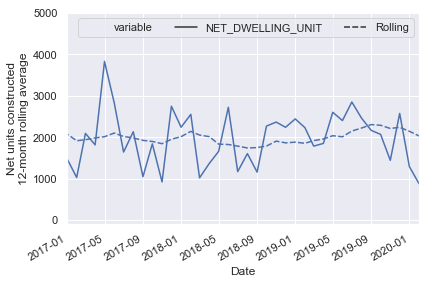

In [13]:
fig = plt.figure(1)
sns.set(style="darkgrid")
sns.lineplot(x="Date", y="value",
             style="variable", 
             data=grouped.melt(id_vars=['Date'], value_vars=['NET_DWELLING_UNIT','Rolling']))
plt.tight_layout(w_pad=1)

plt.ylabel('Net units constructed\n12-month rolling average')
plt.xlim('2017-01', '2020-02')
plt.ylim(-100, 5000)
plt.legend(ncol=3)
fig.autofmt_xdate()
plt.savefig('whole_city.png')



# By Borough

In [14]:
# Group by borough and month
grouped_borough = final.groupby([final.BOROUGH, final.YearMonth]).sum()

# create rolling average for new units
grouped_borough['Rolling'] = grouped_borough.reset_index(level=0).groupby('BOROUGH').NET_DWELLING_UNIT.rolling(window=12, min_periods=1).mean()
grouped_borough.reset_index(inplace=True)
# convert to datetime
grouped_borough['Date'] = pd.to_datetime(grouped_borough.YearMonth, format='%Y-%m')


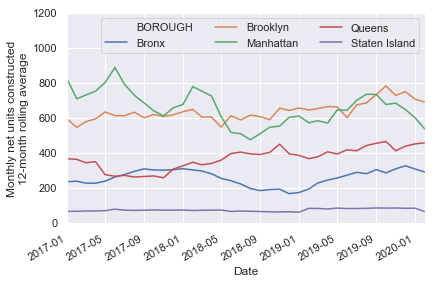

In [15]:
# make lineplot
fig = plt.figure(2)
sns.set(style="darkgrid")
sns.lineplot(x="Date", y="Rolling",
             hue="BOROUGH", 
             data=grouped_borough)
plt.tight_layout(w_pad=1)

plt.ylabel('Monthly net units constructed\n12-month rolling average')
plt.xlim('2017-01', '2020-02')
plt.ylim(-10, 1200)
plt.legend(ncol=3)
fig.autofmt_xdate()
plt.savefig('by_borough.png')

# By Councilmember 

In [16]:
bronx = final [final.BOROUGH == 'Bronx']
brooklyn = final [final.BOROUGH == 'Brooklyn']
manhattan = final [final.BOROUGH == 'Manhattan']
queens = final [final.BOROUGH == 'Queens']
staten_island = final [final.BOROUGH == 'Staten Island']


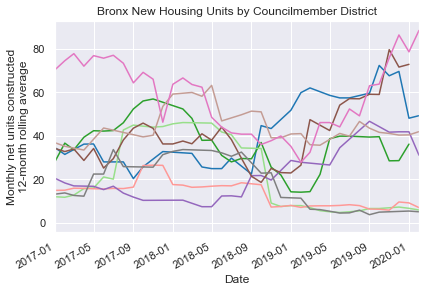

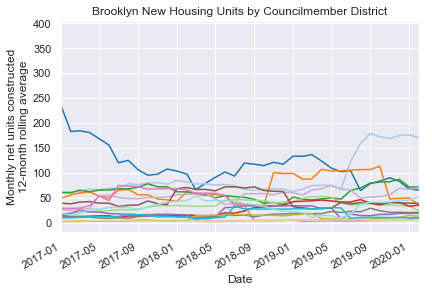

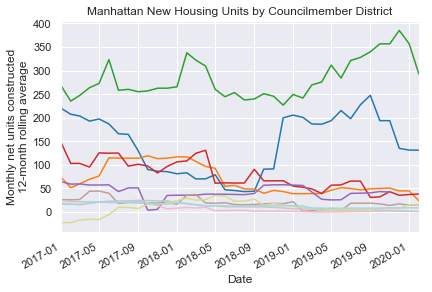

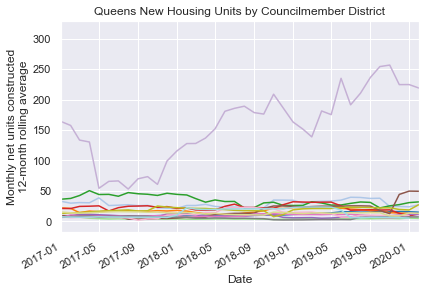

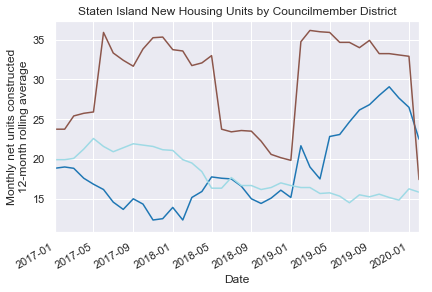

In [17]:
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

for i, borough in enumerate(boroughs):
    df_t = final [final.BOROUGH == borough]
    
    df = df_t.groupby([df_t.COUNCIL_DISTRICT, df_t.YearMonth]).sum()
    # bx_grouped.drop('COUNCIL_DISTRICT',axis=1, inplace=True)
    df['Rolling'] = df.reset_index(level=0).groupby('COUNCIL_DISTRICT').NET_DWELLING_UNIT.rolling(window=12, min_periods=1).mean()
    df.reset_index(inplace=True)
    # convert to datetime
    df['Date'] = pd.to_datetime(df.YearMonth, format='%Y-%m')
  
    df = df[df.COUNCIL_DISTRICT != 0]
    
    # make lineplot
    fig = plt.figure(i+3)
    sns.set(style="darkgrid")
    sns.lineplot(x="Date", y="Rolling",
                 hue="COUNCIL_DISTRICT",
                 palette='tab20',
                 data=df)
    plt.tight_layout(w_pad=1)

    plt.ylabel('Monthly net units constructed\n12-month rolling average')
    plt.xlim('2017-01', '2020-02')
    plt.title('%s New Housing Units by Councilmember District' % borough)
    plt.legend().remove()
    fig.autofmt_xdate()
    plt.savefig('%s.png' % borough) 
    